In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from cmdstanpy import CmdStanModel
from matplotlib import pyplot as plt

# Load and inspect data

In [2]:
df = pd.read_csv("data/data4a.csv")
print(len(df))
print(df.dtypes)
df.head(5)

100
N      int64
y      int64
x    float64
f     object
dtype: object


,N,y,x,f
0,8,1,9.76,C
1,8,6,10.48,C
2,8,5,10.83,C
3,8,6,10.94,C
4,8,1,9.37,C


In [3]:
df.min()

N       8
y       0
x    7.66
f       C
dtype: object

In [4]:
df.max()

N        8
y        8
x    12.44
f        T
dtype: object

In [5]:
df["f"].nunique()

2

In [6]:
def hist_density_plot(ax, data, col_name, hue):
    sns.histplot(ax=ax, data=data, stat="density", x=col_name, hue=hue, multiple="stack")
    sns.kdeplot(ax=ax, data=data, x=col_name, color='k')

def box_strip_plot(ax, data, x, y, hue):
    sns.boxplot(ax=ax, data=data, x=x, y=y, hue=hue, dodge=False)
    sns.stripplot(ax=ax, data=data, x=x, y=y, hue=hue, size=10, edgecolors='k', linewidth=1)
    
def scatter_plot(ax, data, x, y, hue):
    sns.scatterplot(
        ax=ax, 
        data=data, x=x, y=y, 
        style=hue, hue=hue, 
        markers=['o', '^'],
        s=100,
        edgecolor='k', linewidths=10
    )

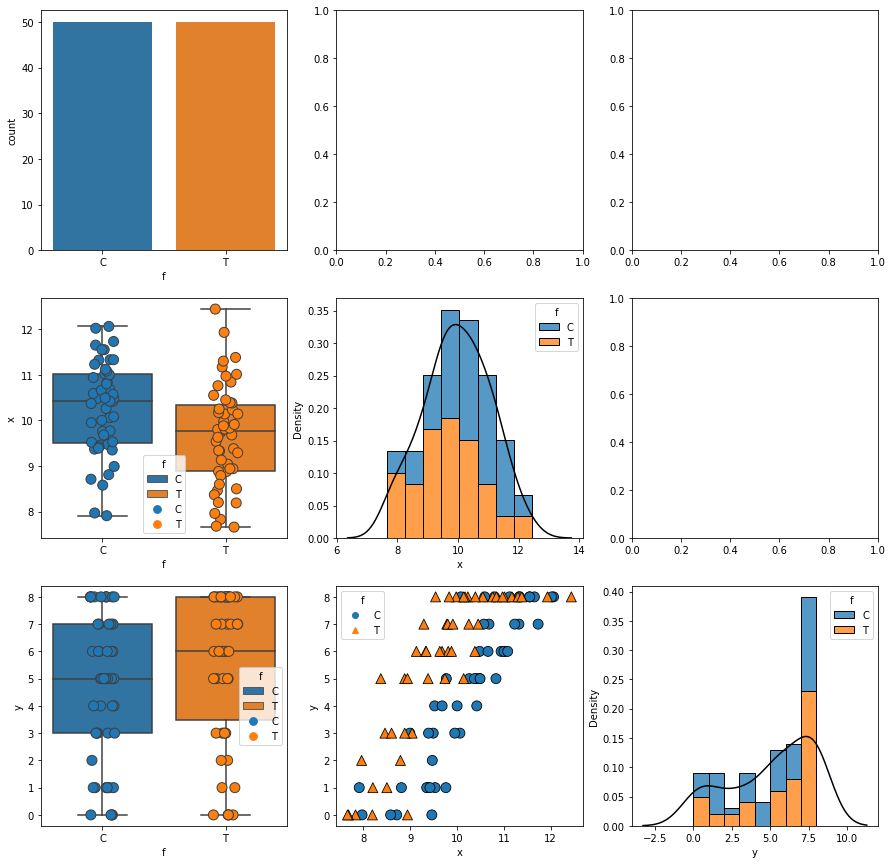

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# f
sns.countplot(ax=axes[0, 0], data=df, x="f")

# x
box_strip_plot(ax=axes[1, 0], data=df, x="f", y="x", hue="f")
hist_density_plot(ax=axes[1, 1], data=df, col_name="x", hue="f")

# y
box_strip_plot(ax=axes[2, 0], data=df, x="f", y="y", hue="f")
scatter_plot(ax=axes[2, 1], data=df, x="x", y="y", hue="f")
hist_density_plot(ax=axes[2, 2], data=df, col_name="y", hue="f")

plt.show()

# Run Stan

In [8]:
model = CmdStanModel(stan_file="model/exec7.stan")
print(model)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /workdir/chap05/model/exec7


CmdStanModel: name=exec7
	 stan_file=/workdir/chap05/model/exec7.stan
	 exe_file=/workdir/chap05/model/exec7
	 compiler_optons=stanc_options=None, cpp_options=None


In [9]:
data = {
    "I": len(df),
    "N": df["N"].values,
    "x": df["x"].values,
    "f": [0 if fchar == 'C' else 1 for fchar in df["f"].values],
    "y": df["y"].values
}

In [10]:
fit = model.sample(data=data)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 1


# Inspect the result

In [11]:
print(fit)

CmdStanMCMC: model=exec7 chains=4['method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	/tmp/tmp6zqly64r/exec7-202009221130-1-qc1j3mtn.csv
	/tmp/tmp6zqly64r/exec7-202009221130-2-kc_ufj5f.csv
	/tmp/tmp6zqly64r/exec7-202009221130-3-ck2akd3d.csv
	/tmp/tmp6zqly64r/exec7-202009221130-4-yeprwiis.csv
 output_files:
	/tmp/tmp6zqly64r/exec7-202009221130-1-qc1j3mtn-stdout.txt
	/tmp/tmp6zqly64r/exec7-202009221130-2-kc_ufj5f-stdout.txt
	/tmp/tmp6zqly64r/exec7-202009221130-3-ck2akd3d-stdout.txt
	/tmp/tmp6zqly64r/exec7-202009221130-4-yeprwiis-stdout.txt


In [12]:
print(fit.num_draws)
print(fit.draws().shape)

1000
(1000, 4, 210)


In [13]:
fit.stan_variables()

{'b': array([[-20.6481 ,   2.05566,   2.10443],
        [-20.5018 ,   2.06078,   2.10212],
        [-22.0282 ,   2.17805,   2.38506],
        ...,
        [-19.4982 ,   1.94779,   2.09035],
        [-19.1968 ,   1.92768,   1.84858],
        [-18.8978 ,   1.88406,   2.02548]]),
 'q': array([[0.357801, 0.709952, 0.834053, ..., 0.458563, 0.908932, 0.255286],
        [0.404047, 0.749346, 0.860134, ..., 0.505913, 0.923902, 0.292538],
        [0.316402, 0.689513, 0.826376, ..., 0.457279, 0.920001, 0.244226],
        ...,
        [0.380415, 0.713945, 0.831507, ..., 0.501343, 0.912354, 0.299086],
        [0.405476, 0.732085, 0.842893, ..., 0.471327, 0.900105, 0.276279],
        [0.375342, 0.699969, 0.818553, ..., 0.492797, 0.903091, 0.297799]]),
 'y_pred': array([[4., 3., 6., ..., 5., 8., 0.],
        [3., 6., 7., ..., 4., 7., 3.],
        [2., 4., 7., ..., 4., 8., 2.],
        ...,
        [2., 5., 5., ..., 1., 8., 3.],
        [3., 5., 7., ..., 5., 8., 3.],
        [3., 4., 8., ..., 4., 8., 

In [14]:
fit_summary = fit.summary()
fit_summary

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-338.375,0.037266,1.19893,-340.826,-338.076,-337.054,1035.05,291.152,1.00075
b[1],-20.000,0.051000,1.40000,-22.000,-20.000,-17.000,782.00,220.000,1.00000
b[2],2.000,0.004900,0.14000,1.700,2.000,2.200,800.00,225.000,1.00000
b[3],2.000,0.007900,0.23000,1.700,2.000,2.400,832.00,234.000,1.00000
q[1],0.380,0.000860,0.03300,0.330,0.380,0.440,1471.00,414.000,1.00000
...,...,...,...,...,...,...,...,...,...
y_pred[96],7.600,0.011000,0.66000,6.000,8.000,8.000,3672.00,1033.000,1.00000
y_pred[97],3.900,0.023000,1.40000,1.000,4.000,6.000,3978.00,1119.000,1.00000
y_pred[98],3.900,0.023000,1.40000,2.000,4.000,6.000,4022.00,1131.000,1.00000


In [15]:
# Check the convergence
fit_summary[fit_summary["R_hat"] >= 1.1]

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,


In [16]:
print(fit.diagnose())

INFO:cmdstanpy:Processing csv files: /tmp/tmp6zqly64r/exec7-202009221130-1-qc1j3mtn.csv, /tmp/tmp6zqly64r/exec7-202009221130-2-kc_ufj5f.csv, /tmp/tmp6zqly64r/exec7-202009221130-3-ck2akd3d.csv, /tmp/tmp6zqly64r/exec7-202009221130-4-yeprwiis.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


Processing csv files: /tmp/tmp6zqly64r/exec7-202009221130-1-qc1j3mtn.csv, /tmp/tmp6zqly64r/exec7-202009221130-2-kc_ufj5f.csv, /tmp/tmp6zqly64r/exec7-202009221130-3-ck2akd3d.csv, /tmp/tmp6zqly64r/exec7-202009221130-4-yeprwiis.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


# Plot the result

In [17]:
y_pred_percentiles = np.percentile(fit.stan_variable("y_pred"), [10.0, 50.0, 90.0], axis=0)

Text(0, 0.5, 'predicted')

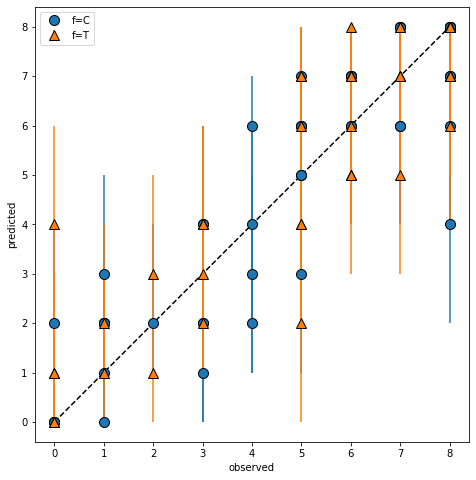

In [18]:
# observation vs. prediction

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)

idx0 = np.where(df["f"].values == "C")[0]
idx1 = np.where(df["f"].values == "T")[0]

ax.errorbar(
    x=df["y"].values[idx0], 
    y=y_pred_percentiles[1][idx0], 
    yerr=np.abs(y_pred_percentiles[[0, 2]][:, idx0] - y_pred_percentiles[1][idx0]),
    fmt='o',
    markersize=10,
    markeredgecolor='k',
    label="f=C"
)

ax.errorbar(
    x=df["y"].values[idx1], 
    y=y_pred_percentiles[1][idx1], 
    yerr=np.abs(y_pred_percentiles[[0, 2]][:, idx1] - y_pred_percentiles[1][idx1]),
    fmt='^',
    markersize=10,
    markeredgecolor='k',
    label="f=T"
)

ax.legend()
ax.plot([0.0, 8.0], [0.0, 8.0], 'k--')
ax.set_aspect("equal")
ax.set_xlabel("observed")
ax.set_ylabel("predicted")